In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from pylab import rcParams
from sklearn import preprocessing

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [72]:
train.head()
# train.tail()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
0,0,25.208249,-16.745748,50.869944,5.593472,1.188263,-6.014167,15.922007,-42.026918,-0.064017,...,6.731995,4.805149,-9.682240,-8.771275,159.124491,3.682115,-4.938090,130.068955,-8.231081,1
1,1,-86.931450,0.428227,2.874836,-8.064850,6.056867,6.124567,2.527879,-9.277728,-7.586313,...,-6.274857,-9.967576,-70.256324,-5.278519,-53.004625,6.484784,-6.389429,-26.164277,-4.909740,2
2,2,42.160934,7.857013,151.612757,9.639676,5.570139,-3.261364,10.814200,-37.394430,-5.791044,...,9.362207,18.524639,39.445002,-1.980687,-7.543595,-1.971843,8.034066,120.510705,7.754377,0
3,3,20.666944,8.680642,-56.449179,-9.814780,-2.382979,-14.596355,-3.621941,49.598995,11.138753,...,0.035327,11.019507,-2.254336,2.216576,65.238695,7.029985,8.940062,-40.426248,5.557970,1
4,4,35.946679,4.573736,-28.160212,-6.912971,4.879375,-0.131064,-2.509488,10.334908,-1.738533,...,-14.119385,-12.166055,50.745103,-2.205711,69.052119,-6.407847,3.399937,-23.468499,-11.269110,0


In [73]:
test.head()


,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
0,7200,-76.795547,-12.319618,-109.961631,-11.006934,-8.770868,-1.246577,3.875265,33.877412,7.757658,...,10.530372,6.887168,-76.231907,3.374217,-128.668656,6.001156,2.619267,-14.869630,-4.718944,4
1,7201,15.860563,-5.344301,74.481876,1.267520,7.044210,6.391507,-7.713534,-1.336639,1.197008,...,4.041697,-9.170853,-38.501120,0.036281,22.997648,-4.050474,-16.322332,-54.813692,14.470087,2
2,7202,21.243900,-7.539082,-13.128054,-7.283449,1.430600,8.113846,-7.219936,-83.107625,-7.449005,...,-2.171528,16.292004,30.960787,0.380944,-86.906365,14.387590,-3.615364,160.603909,-11.330304,2
3,7203,8.999656,-0.397410,-31.769650,3.873494,0.255903,-5.713813,2.786370,28.037992,3.583793,...,-0.578924,8.683254,1.959471,2.281506,-79.247119,-2.850041,-10.813797,-69.974758,-1.369170,4
4,7204,34.330833,-4.469938,-9.004407,-10.726552,-0.845002,0.722776,-1.836055,19.510244,2.785751,...,-2.840026,-7.043582,-28.169285,0.745229,70.852868,-5.185859,2.662763,-20.369640,7.001808,4


#### Checking for missing values

In [51]:
train.isnull().sum()

id            0
feature0      0
feature1      0
feature2      0
feature3      0
             ..
feature246    0
feature247    0
feature248    0
feature249    0
label         0
Length: 252, dtype: int64

In [7]:
test.isnull().sum()

id            0
feature0      0
feature1      0
feature2      0
feature3      0
             ..
feature245    0
feature246    0
feature247    0
feature248    0
feature249    0
Length: 251, dtype: int64

In [75]:
train.describe()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,3599.500000,2.504684,0.615413,3.016680,0.243273,-0.158600,0.506224,-0.276842,0.540687,0.608447,...,0.605181,-0.020437,-0.958585,-0.260203,-4.950015,-0.159411,0.672097,3.745077,0.273164,2.009167
std,2078.605302,67.755261,8.231712,65.188459,8.518782,8.190667,8.356110,8.365744,67.375739,8.133119,...,8.200987,8.390035,64.426649,8.162079,65.950715,8.218073,8.067559,69.372084,8.282975,1.411923
min,0.000000,-236.552276,-28.061843,-226.049557,-28.452153,-33.186906,-27.092009,-31.324360,-244.329485,-27.871326,...,-30.405404,-31.543493,-258.567376,-30.154402,-248.161392,-33.408119,-31.436556,-295.175132,-29.377652,0.000000
25%,1799.750000,-42.590075,-5.004813,-39.828719,-5.587758,-5.582504,-5.227875,-5.904324,-45.382821,-4.945470,...,-5.005272,-5.718761,-44.261020,-5.763305,-49.965317,-5.703261,-4.710237,-43.293031,-5.408092,1.000000
50%,3599.500000,2.920268,0.562655,2.704124,0.292459,-0.117978,0.566189,-0.201625,0.954221,0.567095,...,0.498952,0.011173,-0.394964,-0.401264,-5.736435,-0.094127,0.574117,5.055538,0.182123,2.000000
75%,5399.250000,48.558923,5.964513,46.821744,5.858455,5.371252,6.195204,5.357205,46.362046,6.066210,...,6.002283,5.655573,42.170790,5.331488,39.989426,5.384608,6.003897,49.078444,5.772318,3.000000
max,7199.000000,261.350410,32.566261,249.443153,29.926784,37.680869,28.115217,34.307626,269.012188,32.139129,...,36.079314,32.325529,243.347500,33.403021,223.734432,29.623627,30.877309,244.195967,28.088101,4.000000


#### Data Visulaization

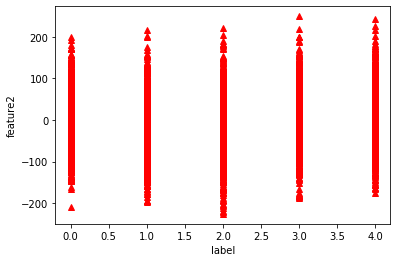

In [74]:
plt.plot(train['label'],train['feature2'], 'r^')
plt.xlabel('label')
plt.ylabel('feature2')
plt.show()

#### Slicing the dataframe into X and y

In [ ]:
y = train['label']
X = train[train.columns[:251]]
X.shape
y.shape

#### Correlation

In [76]:
corr = train.corr()
corr

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
id,1.000000,0.003040,-0.020222,0.004447,0.010268,0.014672,0.011389,-0.008339,-0.000722,-0.008827,...,0.001705,-0.014753,0.005323,0.026354,-0.014583,-0.005855,-0.019323,-0.000763,0.001651,0.019504
feature0,0.003040,1.000000,-0.058414,-0.025977,0.029212,-0.009984,0.088827,-0.041441,0.001432,-0.045928,...,-0.082578,0.050879,0.070298,-0.136426,-0.031922,-0.020918,0.075845,0.074598,0.049553,-0.006644
feature1,-0.020222,-0.058414,1.000000,-0.054582,0.045056,-0.016007,-0.026725,0.003121,-0.067556,-0.015237,...,-0.036134,-0.001212,0.091769,-0.003910,0.062368,-0.002703,-0.022748,-0.065699,-0.080713,-0.008813
feature2,0.004447,-0.025977,-0.054582,1.000000,0.154999,0.131458,0.073397,0.092333,0.079311,-0.036032,...,0.085815,-0.035058,0.001865,-0.057891,-0.051675,-0.112723,-0.053306,-0.108500,-0.023303,0.044647
feature3,0.010268,0.029212,0.045056,0.154999,1.000000,0.004334,0.029222,0.003880,-0.024266,0.039684,...,-0.047920,-0.006471,0.046109,0.027764,-0.034203,-0.027020,-0.024185,0.097515,0.027028,-0.032060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature246,-0.005855,-0.020918,-0.002703,-0.112723,-0.027020,-0.002557,0.017054,0.019288,-0.134891,-0.002107,...,0.011915,0.059032,0.004126,-0.036159,0.126237,1.000000,0.032950,0.131699,-0.017018,0.024691
feature247,-0.019323,0.075845,-0.022748,-0.053306,-0.024185,-0.009327,0.048046,-0.011741,-0.079408,0.057857,...,0.017787,-0.037031,0.068242,-0.012387,0.067497,0.032950,1.000000,0.088161,0.029224,0.048279
feature248,-0.000763,0.074598,-0.065699,-0.108500,0.097515,-0.067311,-0.009728,-0.117122,-0.113826,0.086000,...,-0.029577,0.035901,-0.010868,-0.082278,-0.001565,0.131699,0.088161,1.000000,-0.136376,-0.097844
feature249,0.001651,0.049553,-0.080713,-0.023303,0.027028,-0.046090,0.034227,0.065509,0.100330,0.009460,...,0.035670,0.040281,-0.000645,-0.031176,0.035966,-0.017018,0.029224,-0.136376,1.000000,-0.023600


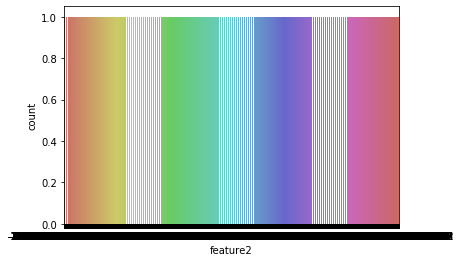

In [47]:
sb.countplot(x='feature2', data = train, palette='hls')

#### Finding best columns using Extra tree classifier

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00315124 0.00365469 0.00376888 0.00456688 0.00406871 0.00374726
 0.0029181  0.00444791 0.00589307 0.00411766 0.00373745 0.0040507
 0.00374465 0.00366672 0.00405688 0.003907   0.00419702 0.00393934
 0.00490602 0.00390105 0.00390027 0.00366316 0.00381565 0.00359802
 0.00436601 0.00371643 0.0039457  0.00313124 0.00517101 0.00369425
 0.00390237 0.00356742 0.00436921 0.00436717 0.0047393  0.00343872
 0.00384956 0.00384946 0.00324204 0.00377242 0.00429347 0.00451921
 0.0044199  0.00401749 0.00358347 0.00366989 0.00449492 0.00340009
 0.00439897 0.00281216 0.00353394 0.00415714 0.0038201  0.00395035
 0.00336907 0.00413883 0.00387132 0.00377356 0.00443043 0.00416038
 0.00432552 0.00395304 0.0038257  0.00313362 0.00367209 0.00357746
 0.00338812 0.00366198 0.00416665 0.00408111 0.00363957 0.00382074
 0.00466417 0.00410099 0.00412896 0.00314129 0.00399469 0.00300514
 0.00423692 0.00386244 0.00437163 0.0042811  0.0053963  0.00411155
 0.00410315 0.00374102 0.00390652 0.00434917 0.00345135 0.00334

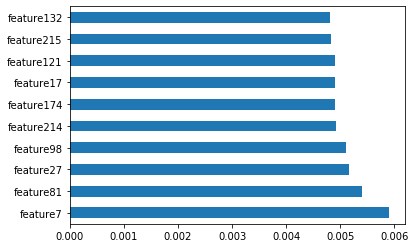

In [56]:

   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


#### Spliting the train data set into train and test sets

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (5760, 251) (5760,)
Test set: (1440, 251) (1440,)


#### Applying K Nearest Neighbor

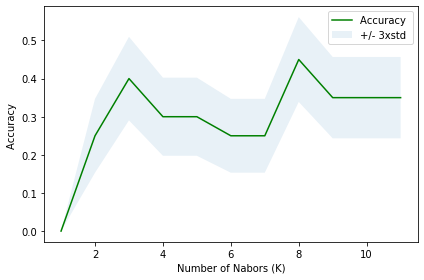

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
K = 12
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(2,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

The best accuracy was with 0.45 with k= 8


#### Random Forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3729166666666667

#### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [63]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7458333333333333

#### SVM

In [35]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
yhat = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.37133532560860183

In [64]:
from sklearn.svm import LinearSVC
clf_svm = LinearSVC(random_state=0)
clf_svm.fit(X_train, y_train)
clf_svm.score(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4232638888888889

In [65]:
clf_svm.score(X_test, y_test)

0.4166666666666667

#### Applying Logistic Regression on test dataset since the accuracy is better with logistic regression

In [67]:
X_test_2 = test[:]
X_test_2

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,7200,-76.795547,-12.319618,-109.961631,-11.006934,-8.770868,-1.246577,3.875265,33.877412,7.757658,...,5.515601,10.530372,6.887168,-76.231907,3.374217,-128.668656,6.001156,2.619267,-14.869630,-4.718944
1,7201,15.860563,-5.344301,74.481876,1.267520,7.044210,6.391507,-7.713534,-1.336639,1.197008,...,-4.515135,4.041697,-9.170853,-38.501120,0.036281,22.997648,-4.050474,-16.322332,-54.813692,14.470087
2,7202,21.243900,-7.539082,-13.128054,-7.283449,1.430600,8.113846,-7.219936,-83.107625,-7.449005,...,-1.748731,-2.171528,16.292004,30.960787,0.380944,-86.906365,14.387590,-3.615364,160.603909,-11.330304
3,7203,8.999656,-0.397410,-31.769650,3.873494,0.255903,-5.713813,2.786370,28.037992,3.583793,...,19.629190,-0.578924,8.683254,1.959471,2.281506,-79.247119,-2.850041,-10.813797,-69.974758,-1.369170
4,7204,34.330833,-4.469938,-9.004407,-10.726552,-0.845002,0.722776,-1.836055,19.510244,2.785751,...,-5.110906,-2.840026,-7.043582,-28.169285,0.745229,70.852868,-5.185859,2.662763,-20.369640,7.001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,11995,39.416815,3.933817,52.234164,8.749412,7.721703,16.095362,1.286118,-36.709747,-0.606019,...,9.377529,-1.197907,-2.359692,7.001312,-1.960734,35.612092,-7.686186,-1.908971,-2.533523,10.676415
4796,11996,68.206392,10.051996,-18.871516,-6.261448,-5.699148,1.279330,-10.953200,-72.816309,8.179619,...,-15.744967,-0.922851,-5.255280,-41.272192,-4.013167,-10.229495,3.632438,-9.716698,169.407207,-7.742444
4797,11997,-148.068267,4.316605,69.739872,3.766995,8.883144,3.106946,2.496049,-13.037554,-7.801937,...,-0.308542,3.679442,-5.215854,72.371911,1.246290,2.138499,2.803264,5.029515,85.871847,-3.542720
4798,11998,-14.008455,8.128674,-9.168155,-0.834882,4.750826,0.801932,0.852702,-50.592155,-0.020082,...,-4.813812,3.064464,14.233130,7.809022,-4.106624,69.339763,5.312685,4.450861,25.916030,2.995570


In [68]:
y_pred = LR.predict(X_test_2)
y_pred_prob = LR.predict_proba(X_test_2)

#### Predicted label values of test set

In [78]:
test['label'] = pd.DataFrame(y_pred)
test

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
0,7200,-76.795547,-12.319618,-109.961631,-11.006934,-8.770868,-1.246577,3.875265,33.877412,7.757658,...,10.530372,6.887168,-76.231907,3.374217,-128.668656,6.001156,2.619267,-14.869630,-4.718944,4
1,7201,15.860563,-5.344301,74.481876,1.267520,7.044210,6.391507,-7.713534,-1.336639,1.197008,...,4.041697,-9.170853,-38.501120,0.036281,22.997648,-4.050474,-16.322332,-54.813692,14.470087,2
2,7202,21.243900,-7.539082,-13.128054,-7.283449,1.430600,8.113846,-7.219936,-83.107625,-7.449005,...,-2.171528,16.292004,30.960787,0.380944,-86.906365,14.387590,-3.615364,160.603909,-11.330304,2
3,7203,8.999656,-0.397410,-31.769650,3.873494,0.255903,-5.713813,2.786370,28.037992,3.583793,...,-0.578924,8.683254,1.959471,2.281506,-79.247119,-2.850041,-10.813797,-69.974758,-1.369170,4
4,7204,34.330833,-4.469938,-9.004407,-10.726552,-0.845002,0.722776,-1.836055,19.510244,2.785751,...,-2.840026,-7.043582,-28.169285,0.745229,70.852868,-5.185859,2.662763,-20.369640,7.001808,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,11995,39.416815,3.933817,52.234164,8.749412,7.721703,16.095362,1.286118,-36.709747,-0.606019,...,-1.197907,-2.359692,7.001312,-1.960734,35.612092,-7.686186,-1.908971,-2.533523,10.676415,1
4796,11996,68.206392,10.051996,-18.871516,-6.261448,-5.699148,1.279330,-10.953200,-72.816309,8.179619,...,-0.922851,-5.255280,-41.272192,-4.013167,-10.229495,3.632438,-9.716698,169.407207,-7.742444,2
4797,11997,-148.068267,4.316605,69.739872,3.766995,8.883144,3.106946,2.496049,-13.037554,-7.801937,...,3.679442,-5.215854,72.371911,1.246290,2.138499,2.803264,5.029515,85.871847,-3.542720,4
4798,11998,-14.008455,8.128674,-9.168155,-0.834882,4.750826,0.801932,0.852702,-50.592155,-0.020082,...,3.064464,14.233130,7.809022,-4.106624,69.339763,5.312685,4.450861,25.916030,2.995570,4


In [80]:
test_submission = test[['id','label']]
test_submission

,id,label
0,7200,4
1,7201,2
2,7202,2
3,7203,4
4,7204,4
...,...,...
4795,11995,1
4796,11996,2
4797,11997,4
4798,11998,4


In [81]:
test_submission.to_excel("result.xlsx",sheet_name="result")